In [1]:
%matplotlib inline
import pylab as plt
import numpy as np

In [64]:
from objsimpy.stim.stim_sequence import InputTrace
from objsimpy.som_results import show_preferred_stimulus_maps, show_preferred_stimuli_x_y
from objsimpy.eval_sim_data import calc_response_strength2_PICKLED
from objsimpy.eval_sim_data import calc_response_strength2, calc_preferred_stimuli_from_response
from objsimpy.som_results import evaluate_single_sim, calc_response_selectivity
from objsimpy.sim_data import SimInfo

In [3]:
simname = "som02_gaussian"
from objsimpy.config import SIMDATA_BASE_DIR, OBJSIM_DIR
import os
data_dir = os.path.join(SIMDATA_BASE_DIR, 'objsim', simname)

In [4]:
ls $data_dir

backup_settings
error.txt
InhibitionLayer.info
InhibitionLayerspikes.dat.bin
InhibitionLayerspikes.datTEST0.bin
InputLayer0.info
InputLayer0spikes.dat.bin
InputLayer0spikes.datTEST0.bin
MovieScanInput0.inp.dat
MovieScanInput0.inp.datTEST0
output.txt
RepresentationLayer.info
RepresentationLayerspikes.dat.bin
RepresentationLayerspikes.datTEST0.bin
RepresentationLayerspikes.datTEST0.bin.response.pickle
SimModInvarLayer.info
SimModInvarLayerspikes.datTEST0.bin
Sim.SimInfo


In [5]:
import objsimpy.spike_file as spike_file

In [6]:
spike_file_name = os.path.join(data_dir, "RepresentationLayerspikes.datTEST0.bin")
spikes = spike_file.read(spike_file_name)
spike_times, neuron_numbers = spikes

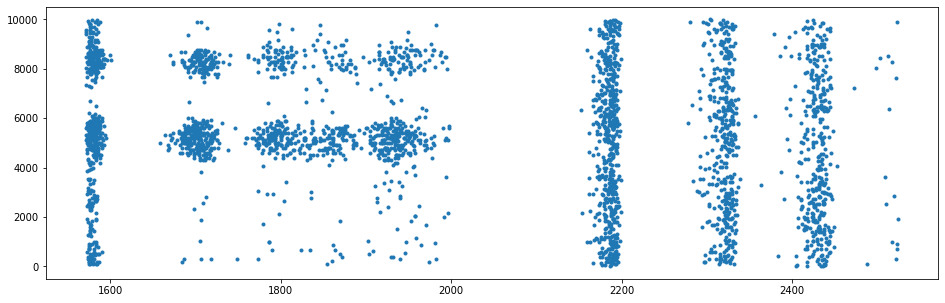

In [40]:
t1 = 10000
t2 = 13000
plt.figure(figsize=(16, 5))
plt.plot(spike_times[t1:t2], neuron_numbers[t1:t2], '.')

In [8]:
from objsimpy.stim.stim_sequence import read_input_file, InputTrace
fname_input = os.path.join(data_dir, "MovieScanInput0.inp.datTEST0")
input_trace = InputTrace(fname_input)

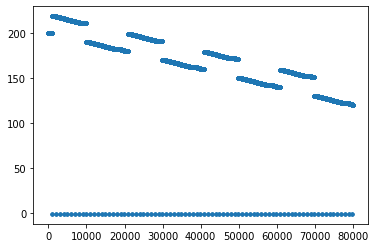

In [9]:
plt.plot(input_trace.nparray[t1:t2], '.')

In [42]:
response_strength_pickle_file = os.path.join(data_dir, spike_file_name + ".response.pickle")
response_strength = calc_response_strength2_PICKLED(
    response_strength_pickle_file, 
    spikes, 
    input_trace,
    100, 500,
    10000,
    #reevaluate=True
)

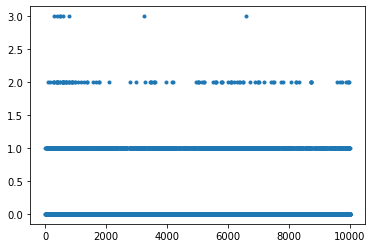

In [49]:
plt.plot(response_strength[:,200], '.')

In [44]:
sim_info = SimInfo(os.path.join(data_dir, "Sim.SimInfo"))
layer_name = "RepresentationLayer"
input_name = "MovieScanInput0"
layer_info = [l for l in sim_info.get_layers() if l.name==layer_name][0]
n_neurons = layer_info.LayerDimensions['N']

0.13947333333333342


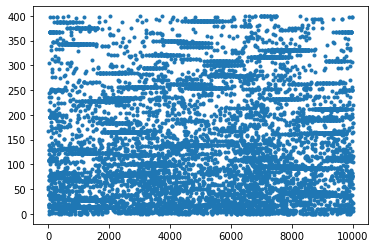

In [60]:
total_mean_response = response_strength.mean()
print(total_mean_response)
plt.plot(response_strength.argmax(axis=1), '.')

In [62]:
preferred_stim = response_strength.argmax(axis=1)
nx = sim_info.get_inputs()[0].NXPara
ny = sim_info.get_inputs()[0].NYPara

In [65]:
pref_stimuli, selectivity = calc_preferred_stimuli_from_response(response_strength)

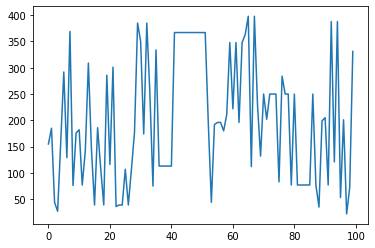

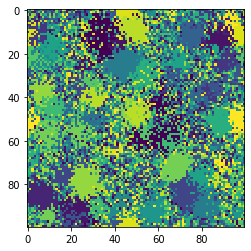

In [77]:
plt.imshow(pref_stimuli // nx)

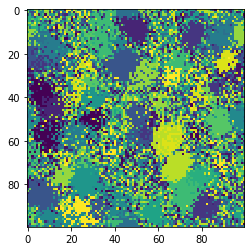

In [76]:
plt.imshow(pref_stimuli % nx)

(array([ 0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        21.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.

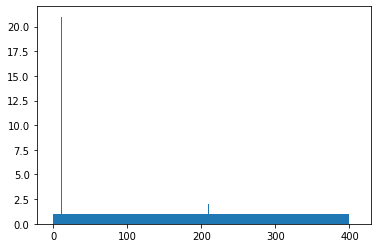

In [48]:
stim_onsets = input_trace.get_stim_onset()
stim_numbers = [onset[1] for onset in stim_onsets]
plt.hist(stim_numbers, bins=list(range(-2,410)))